In [1]:
import torch
from torch import nn

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

## 0. CV libs in PyTorch
* [`torchvision`] - base lib
* `torchvision.datasets` - prepared datasets
* `torchvision.models` - pretrained models
* `torchvision.transforms`
* `torch.utils.data.Dataset` - Base dataset class for PyTorch
* `torch.utils.data.Dataloader` - Python iterable over a dataset

In [3]:
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

## 1. Getting a dataset

FashionMNIST

In [4]:
# Setup training dataset
train_data = datasets.FashionMNIST(
    root="data", # where to download
    train=True, # do we want a training dataset
    download=True,
    transform=ToTensor(), # how do we want to transform the data
    target_transform=None, # how do we want to transform the LABELS
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None,
)


100%|██████████| 26421880/26421880 [00:01<00:00, 16603292.24it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 318981.70it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5571896.56it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 17756806.74it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [5]:
!ls data

FashionMNIST


In [6]:
len(train_data), len(test_data)

(60000, 10000)

In [7]:
# See the first training example

image, label = train_data[0]
print(image, label)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [8]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [10]:
# check the shape
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [11]:
## 1. Visualise our data

Text(0.5, 1.0, '9')

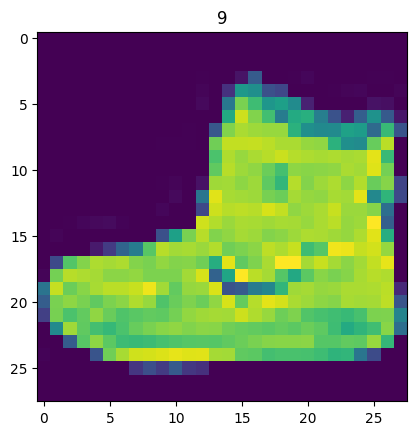

In [12]:
image, label = train_data[0]
plt.imshow(image.permute(1, 2, 0))
plt.title(f"{label}")

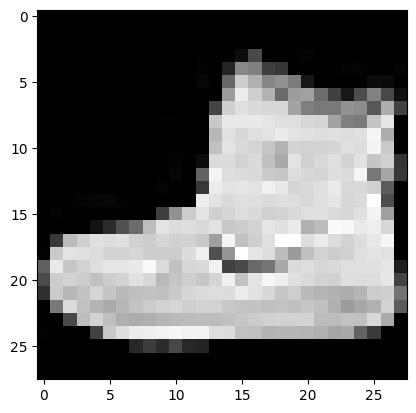

In [13]:
plt.imshow(image.permute(1, 2, 0), cmap="gray")

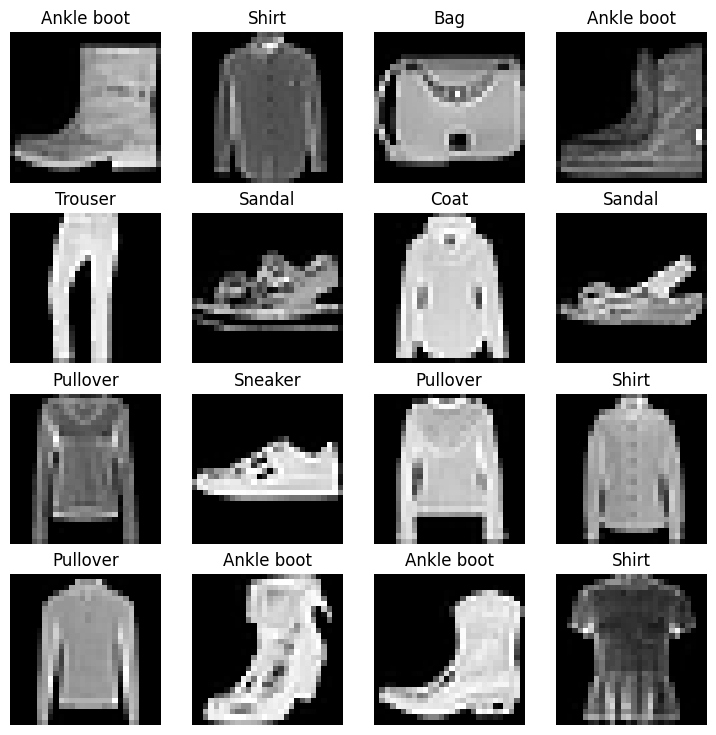

In [14]:
# Plot more images
NUM_TO_VIS = 10

torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4

for i in range(1, rows * cols + 1):
    ridx = torch.randint(0, len(train_data), size=[1]).item()
    rim, rlabel = train_data[ridx]

    fig.add_subplot(rows, cols, i)
    plt.imshow(rim.permute(1, 2, 0), cmap="gray")
    plt.title(class_names[rlabel])
    plt.axis(False);

## 2. Prepare the dataloader

Why bathces?

1. Computation efficient
2. It gives our MM more chances to update its gradients per epoch.


In [15]:
from torch.utils.data import DataLoader

torch.manual_seed(42)

BATCH_SIZE = 32

train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
)

In [16]:
# Let's check what I've created

In [17]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [18]:
train_features_batch, train_features_labels = next(iter(train_dataloader))

torch.Size([1, 28, 28])
Pullover


(-0.5, 27.5, 27.5, -0.5)

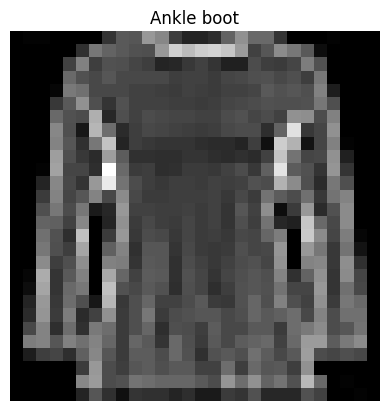

In [19]:
# Show a sample
# torch.manual_seed(42)

random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
rim = train_features_batch[random_idx]
print(rim.shape)
print(class_names[train_features_labels[random_idx].item()])


plt.imshow(rim.permute(1,2,0), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

## 3. Model 0: Baseline model

In [20]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
x.shape

torch.Size([1, 28, 28])

In [21]:
output = flatten_model(x)
output.shape

torch.Size([1, 784])

In [22]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(
                in_features=input_shape,
                out_features=hidden_units,
            ),
            nn.Linear(
                in_features=hidden_units,
                out_features=output_shape,
            )
        )

    def forward(self, x):
        return self.layer_stack(x)

In [23]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=28 * 28,
    hidden_units=10,
    output_shape=len(class_names)
).to("cpu")

In [24]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [25]:
! pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 5.3 MB/s eta 0:00:00


In [26]:
from torchmetrics import F1Score

loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(
    params=model_0.parameters(),
    lr=0.01,
)
metric_fn = F1Score(
    task="multiclass",
    num_classes=len(class_names),
)

## 3.2 Creating a function to time our experiments

In [27]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f"Device: {device}: {total_time:.3f} s")
    return total_time

In [28]:
st = timer()
# some code
et = timer()
print(print_train_time(st, et))

Device: None: 0.000 s
5.2778999986458075e-05


### 3.3 Training and testing with mini-batches of data

In [29]:
from tqdm.auto import tqdm

In [30]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_time_start_on_cpu = timer()

epochs = 3


for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")

    train_loss = 0
    # Add a loop to loop through the training batches
    model_0.train()
    for batch, (X, y) in tqdm(
        enumerate(train_dataloader),
        total=len(train_dataloader)
    ):

        y_pred = model_0(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        opt.zero_grad()

        loss.backward()

        opt.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples.")


    train_loss /= len(train_dataloader)

    test_loss, test_metric = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for _, (X_test, y_test) in tqdm(
            enumerate(test_dataloader),
            total=len(test_dataloader)
        ):
            test_pred = model_0(X_test)

            test_loss += loss_fn(test_pred, y_test)

            test_metric += metric_fn(
                test_pred.argmax(dim=1),
                y_test,
            )

        test_loss /= len(test_dataloader)
        test_metric /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test f1score: {test_metric:.3f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(
    train_time_start_on_cpu,
    train_time_end_on_cpu,
    device=str(next(model_0.parameters()).device),
)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------


  0%|          | 0/1875 [00:00<?, ?it/s]

Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.


  0%|          | 0/313 [00:00<?, ?it/s]


Train loss: 0.9096 | Test loss: 0.6290, Test f1score: 0.786
Epoch: 1
------


  0%|          | 0/1875 [00:00<?, ?it/s]

Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.


  0%|          | 0/313 [00:00<?, ?it/s]


Train loss: 0.5573 | Test loss: 0.5441, Test f1score: 0.811
Epoch: 2
------


  0%|          | 0/1875 [00:00<?, ?it/s]

Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.


  0%|          | 0/313 [00:00<?, ?it/s]


Train loss: 0.5027 | Test loss: 0.5137, Test f1score: 0.820
Device: cpu: 43.494 s


## 4. Make predictions and get Model 0 results

In [31]:
from typing import Dict


def eval_model(
        model: torch.nn.Module,
        data_loader: torch.utils.data.DataLoader,
        loss_fn: torch.nn.Module,
        metric_fn,
        device: str,
) -> Dict:
    loss, metric = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X, y = X.to(device), y.to(device)
            # Make predictions
            y_pred = model(X)

            loss += loss_fn(y_pred, y)
            metric += metric_fn(y_pred.argmax(dim=1), y)

        loss /= len(data_loader)
        metric /= len(data_loader)

    return {
        "model_name": model.__class__.__name__,
        "model_loss": loss.item(),
        "model_metric": metric.item(),
        "device": device,
    }


In [32]:
model_0_results = eval_model(
    model_0, test_dataloader,
    loss_fn, metric_fn,
    device='cpu'
)

  0%|          | 0/313 [00:00<?, ?it/s]

In [33]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5136751532554626,
 'model_metric': 0.8199880123138428,
 'device': 'cpu'}

## 5. Setup device agnostic code

In [34]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [35]:
# how to move dataloader to gpu?..

In [36]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 in_size: int,
                 out_size: int,
                 hidden_units: int = 20):
        super().__init__()
        self.layers_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(
                in_features=in_size,
                out_features= hidden_units,
            ),
            nn.ReLU(),
            nn.Linear(
                in_features=hidden_units,
                out_features=hidden_units,
            ),
            # nn.ReLU(),
            # nn.Linear(
            #     in_features=hidden_units,
            #     out_features=out_size,
            # )
        )

    def forward(self, x):
        return self.layers_stack(x)

In [37]:
model_1 = FashionMNISTModelV1(
    in_size=28 * 28,
    out_size=len(class_names),
    hidden_units=10,
).to(device)

In [38]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [39]:
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(
    params=model_1.parameters(),
    lr=0.01,
)
metric_fn = F1Score(
    task="multiclass",
    num_classes=len(class_names)
).to(device)

In [40]:
from typing import Tuple

In [41]:
def train_step(
        model: nn.Module,
        data_loader: torch.utils.data.DataLoader,
        loss_fn: nn.Module,
        opt,
        device: str,
) -> float:
    model.train()

    train_loss = 0

    for X, y in tqdm(data_loader):
        X, y = X.to(device), y.to(device)
        y_logits = model(X)

        batch_train_loss = loss_fn(y_logits, y)
        train_loss += batch_train_loss

        opt.zero_grad()

        batch_train_loss.backward()

        opt.step()

    train_loss /= len(data_loader)

    return train_loss

In [42]:
def test_step(
        model: nn.Module,
        data_loader: torch.utils.data.DataLoader,
        loss_fn: nn.Module,
        metric_fn,
        device: str,
) -> Tuple[float, float]:
    model.eval()

    test_loss = 0
    test_metric = 0

    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X, y = X.to(device), y.to(device)

            test_preds = model(X.to(device))
            test_loss += loss_fn(test_preds, y)
            test_metric += metric_fn(test_preds.argmax(dim=1), y)

        test_loss /= len(data_loader)
        test_metric /= len(data_loader)

    return test_loss, test_metric


In [43]:
def train_model(
        epochs: int,
        model: nn.Module,
        train_dataloader: torch.utils.data.DataLoader,
        test_dataloader: torch.utils.data.DataLoader,
        loss_fn: nn.Module,
        metric_fn,
        opt,
        device: str
) -> Dict:
    train_start_time = timer()

    for epoch in tqdm(range(epochs)):
        print(f"Epoch {epoch} -------")
        train_loss = train_step(
            model, train_dataloader, loss_fn, opt, device=device
        )
        test_loss, test_metric = test_step(
            model, test_dataloader, loss_fn, metric_fn, device=device
        )
        print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test f1score: {test_metric:.3f}")


    train_end_time = timer()
    print_train_time(
        train_start_time,
        train_end_time,
        device=device,
    )


In [44]:
epochs = 5

torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_model(
    epochs=epochs,
    model=model_1,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    loss_fn=loss_fn,
    metric_fn=metric_fn,
    opt=opt,
    device=device
)

model_1_result = eval_model(
    model=model_1,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    metric_fn=metric_fn,
    device=device,
)


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 0 -------


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]


Train loss: 1.1229 | Test loss: 0.7846, Test f1score: 0.706
Epoch 1 -------


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]


Train loss: 0.6737 | Test loss: 0.6256, Test f1score: 0.777
Epoch 2 -------


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]


Train loss: 0.5752 | Test loss: 0.6155, Test f1score: 0.768
Epoch 3 -------


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]


Train loss: 0.5350 | Test loss: 0.5516, Test f1score: 0.805
Epoch 4 -------


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]


Train loss: 0.5118 | Test loss: 0.5281, Test f1score: 0.815
Device: cuda: 62.796 s


  0%|          | 0/313 [00:00<?, ?it/s]

In [45]:
model_1_result

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.5281340479850769,
 'model_metric': 0.8149960041046143,
 'device': 'cuda'}

**Note**: Sometimes, depending on data/hardware models could train faster on CPU.

Why?

1. Copying to GPU requires time.
2. The hardware (bad GPU, good CPU).

## Model 2: Convolutional Neural Network

In [46]:
class FashionMNISTModeV2(nn.Module):
    """
    Model architechture that replicates the TinyVGG
    """
    def __init__(
            self,
            input_shape: int,
            hidden_units: int,
            output_shape: int,
    ):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(
                kernel_size=2,
            )
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(
                kernel_size=2,
            )
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(
                in_features=hidden_units * 7 * 7, # ????
                out_features=output_shape
            )
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        return self.classifier(x)


In [47]:
torch.manual_seed(42)
model_2 = FashionMNISTModeV2(
    input_shape=1,
    hidden_units=10,
    output_shape=10
).to(device)

In [48]:
model_2.eval()
with torch.inference_mode():
    x = torch.randn(size=(1, 1, 28, 28)).to(device)
    model_2(x)

In [49]:
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(
    params=model_2.parameters(),
    lr=0.1,
)
# opt = torch.optim.Adam(
#     params=model_2.parameters(),
#     lr=0.001,
# )
metric_fn = F1Score(
    task="multiclass",
    num_classes=len(class_names)
).to(device)

In [50]:
epochs = 10

torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_model(
    epochs=epochs,
    model=model_2,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    loss_fn=loss_fn,
    metric_fn=metric_fn,
    opt=opt,
    device=device
)

model_2_result = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    metric_fn=metric_fn,
    device=device,
)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0 -------


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]


Train loss: 0.6115 | Test loss: 0.4990, Test f1score: 0.809
Epoch 1 -------


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]


Train loss: 0.3704 | Test loss: 0.3585, Test f1score: 0.870
Epoch 2 -------


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]


Train loss: 0.3339 | Test loss: 0.3934, Test f1score: 0.852
Epoch 3 -------


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]


Train loss: 0.3098 | Test loss: 0.3166, Test f1score: 0.885
Epoch 4 -------


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]


Train loss: 0.2953 | Test loss: 0.3101, Test f1score: 0.889
Epoch 5 -------


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]


Train loss: 0.2836 | Test loss: 0.2952, Test f1score: 0.893
Epoch 6 -------


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]


Train loss: 0.2761 | Test loss: 0.3008, Test f1score: 0.891
Epoch 7 -------


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]


Train loss: 0.2684 | Test loss: 0.2931, Test f1score: 0.897
Epoch 8 -------


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]


Train loss: 0.2647 | Test loss: 0.2966, Test f1score: 0.893
Epoch 9 -------


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]


Train loss: 0.2589 | Test loss: 0.2947, Test f1score: 0.895
Device: cuda: 150.065 s


  0%|          | 0/313 [00:00<?, ?it/s]

In [52]:
import pandas as pd

compare_results = pd.DataFrame([
    model_0_results,
    model_1_result,
    model_2_result
])
compare_results

,model_name,model_loss,model_metric,device
0,FashionMNISTModelV0,0.513675,0.819988,cpu
1,FashionMNISTModelV1,0.528134,0.814996,cuda
2,FashionMNISTModeV2,0.294668,0.895068,cuda


Text(0, 0.5, 'model')

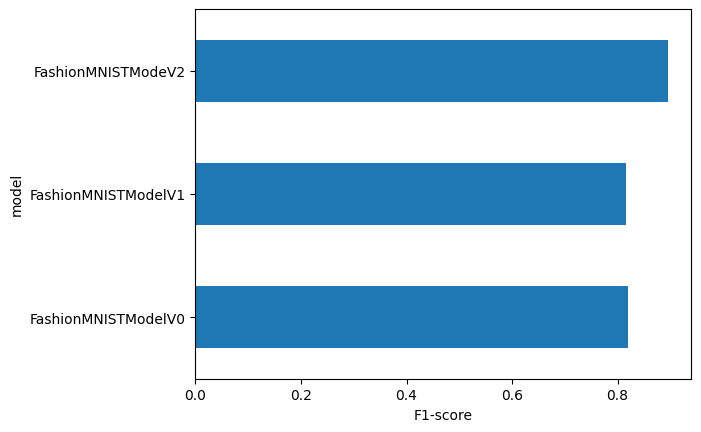

In [54]:
compare_results.set_index("model_name")["model_metric"].plot(kind="barh")
plt.xlabel("F1-score")
plt.ylabel("model")

## 7. Make and evaluate random predictiona

In [56]:
def make_predictions(
        model: torch.nn.Module,
        data: list,
        device: torch.device=device
):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:

            sample = torch.unsqueeze(sample, dim=0).to(device)
            pred_logit = model(sample)

            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            pred_probs.append(pred_prob.cpu())


    return torch.stack(pred_probs)

In [89]:
import random
# random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

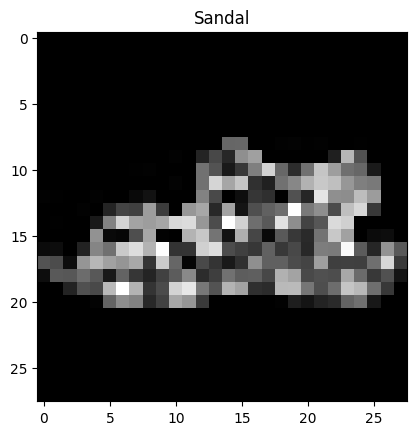

In [90]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [91]:
# Make predictions

pred_probs = make_predictions(
    model=model_2,
    data=test_samples,
    device=device,
)

In [92]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 6, 6, 4, 3, 6, 2, 3, 6])

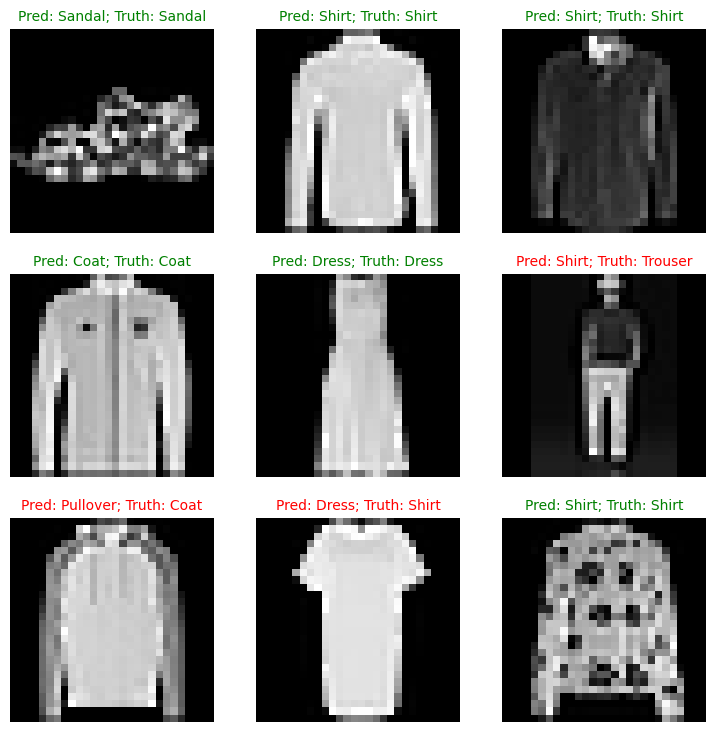

In [93]:
plt.figure(figsize=(9,9))
n_rows = 3
n_cols = 3

for idx, sample in enumerate(test_samples):
    plt.subplot(n_rows, n_cols, idx + 1)
    plt.imshow(sample.squeeze(), cmap="gray")

    pred_label = class_names[pred_classes[idx]]
    truth_label = class_names[test_labels[idx]]

    title_text = f"Pred: {pred_label}; Truth: {truth_label}"
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g")
    else:
        plt.title(title_text, fontsize=10, c="r")
    plt.axis(False)

## 8. Confusion matrix

In [102]:
from tqdm.auto import tqdm

y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions..."):
        X, y = X.to(device), y.to(device)

        y_logits = model_2(X)

        y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)

        y_preds.append(y_pred.cpu())

# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
# y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

In [97]:
import mlxtend

In [94]:
from torchmetrics import ConfusionMatrix

In [104]:
conf_mat_fn = ConfusionMatrix(
    task="multiclass",
    num_classes=10,
)

In [105]:
from mlxtend.plotting import plot_confusion_matrix

confmat_tensor = conf_mat_fn(preds=y_pred_tensor, target=test_data.targets)

In [106]:
confmat_tensor

tensor([[724,   5,  30,  51,  11,   0, 177,   0,   2,   0],
        [ 12, 901,   8,  58,  15,   1,   5,   0,   0,   0],
        [ 12,   3, 774,   9,  88,   0, 111,   0,   3,   0],
        [ 21,   8,  26, 864,  44,   0,  35,   0,   2,   0],
        [  3,   2,  85,  38, 751,   0, 115,   0,   6,   0],
        [  9,   2,   2,   3,   4, 795,   8,  87,  63,  27],
        [ 99,   5,  81,  57,  80,   1, 667,   0,  10,   0],
        [  0,   0,   0,   0,   0,  16,   0, 953,   5,  26],
        [ 25,   6,  26,  15,  13,   5,  74,  12, 822,   2],
        [  0,   1,   1,   1,   0,  24,   6, 140,  19, 808]])

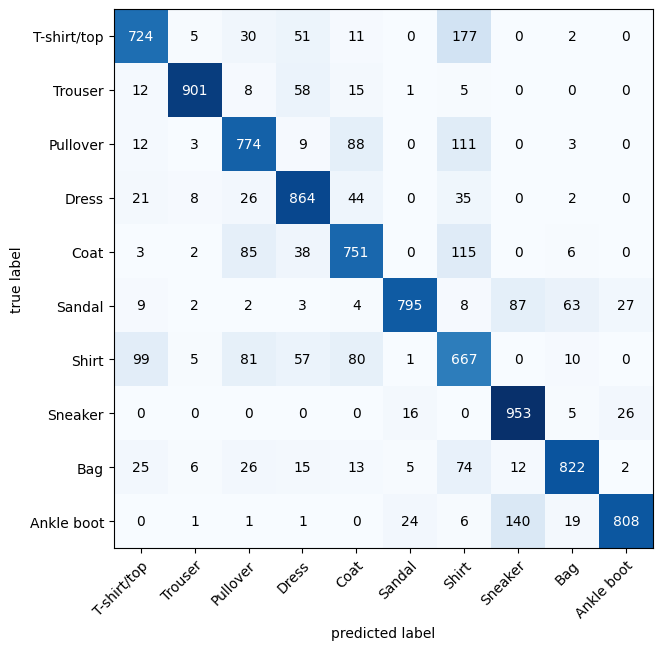

In [107]:
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names = class_names,
    figsize=(10, 7),
)

## 9. Saving and loading the best model

In [108]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(
    parents=True,
    exist_ok=True,
)

MODEL_NAME = "03_pytorch_cv_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

In [110]:
torch.save(
    obj=model_2.state_dict(),
    f=MODEL_SAVE_PATH
)

In [113]:
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModeV2(
    input_shape=1,
    hidden_units=10,
    output_shape=10
)
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>